https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/cohorts/2024/03-orchestration/homework.md

The goal of this homework is to train a simple model for predicting the duration of a ride, but use `Mage` for it.

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page), the Yellow taxi data for 2023.

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.base import BaseEstimator
from typing import Tuple

# Question 1. Run Mage

What's the version of Mage we run?

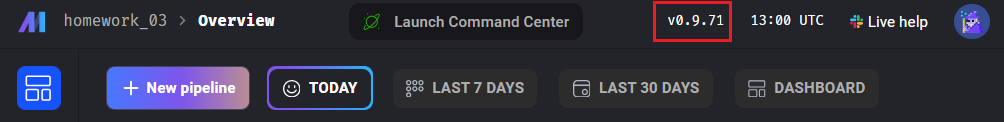

Answer: __0.9.71__

# Question 2. Creating a project

Now let's create a new project. We can call it "homework_03", for example.

How many lines are in the created `metadata.yaml` file?

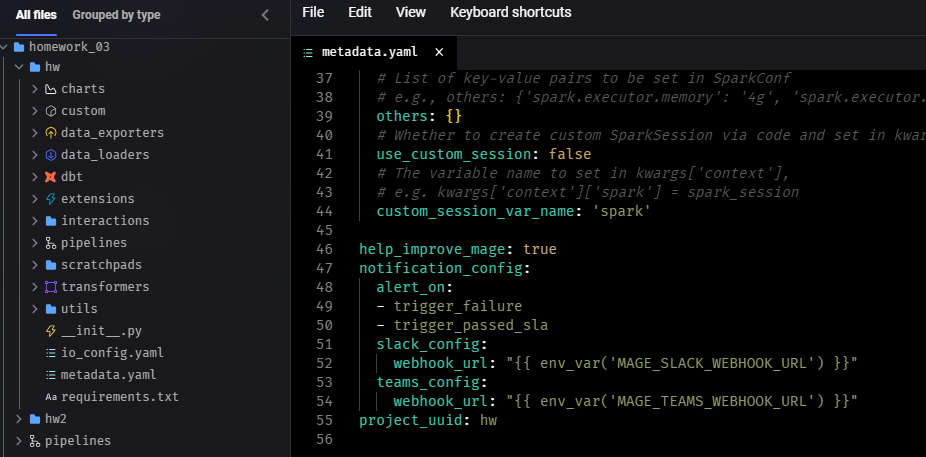

Answer: __55__

# Question 3. Creating a pipeline

Let's create an ingestion code block.

In this block, we will read the March 2023 Yellow taxi trips data.

How many records did we load?

In [1]:
url_yellow_mar_2023 = 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-03.parquet'

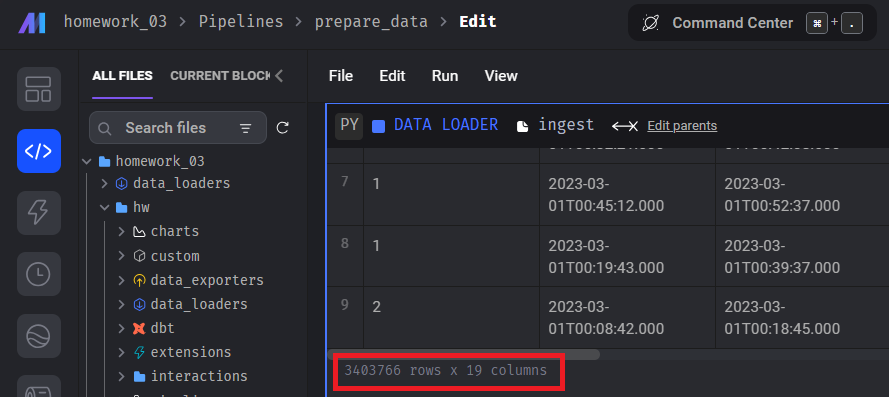

Answer: __3 403 766__

# Question 4. Data preparation

Let's use the same logic for preparing the data we used previously. We will need to create a transformer code block and put this code there.

This is what we used (adjusted for yellow dataset):

In [6]:
def transform(df: pd.DataFrame, **kwargs) -> pd.DataFrame:
    
    df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
    df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)

    return df

Let's adjust it and apply to the data we loaded in question 3.

What's the size of the result?

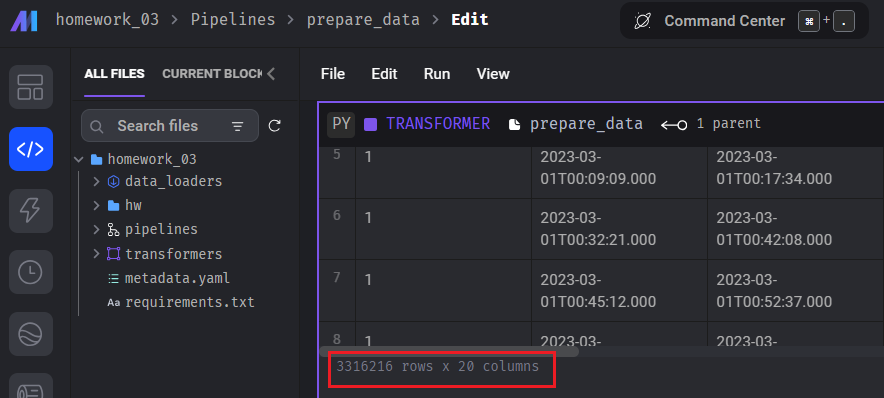

Answer: __3 316 216__

# Question 5. Train a model

We will now train a linear regression model using the same code as in homework 1

* Fit a dict vectorizer
* Train a linear regression with default parameres
* Use pick up and drop off locations separately, don't create a combination feature

Let's now use it in the pipeline. We will need to create another transformation block, and return both the dict vectorizer and the model

What's the intercept of the model?

Hint: print the `intercept_` field in the code block

In [7]:
def transform(df: pd.DataFrame, **kwargs) -> Tuple[BaseEstimator, BaseEstimator]:

    cat_columns = ['PULocationID', 'DOLocationID']
    df_dict = df[cat_columns].astype(str).to_dict(orient='records')

    enc = DictVectorizer(sparse=True)
    X = enc.fit_transform(df_dict)
    y = df['duration']

    model = LinearRegression()
    model.fit(X, y)

    print(f"intercept: {model.intercept_:.2f}")

    return model, enc 

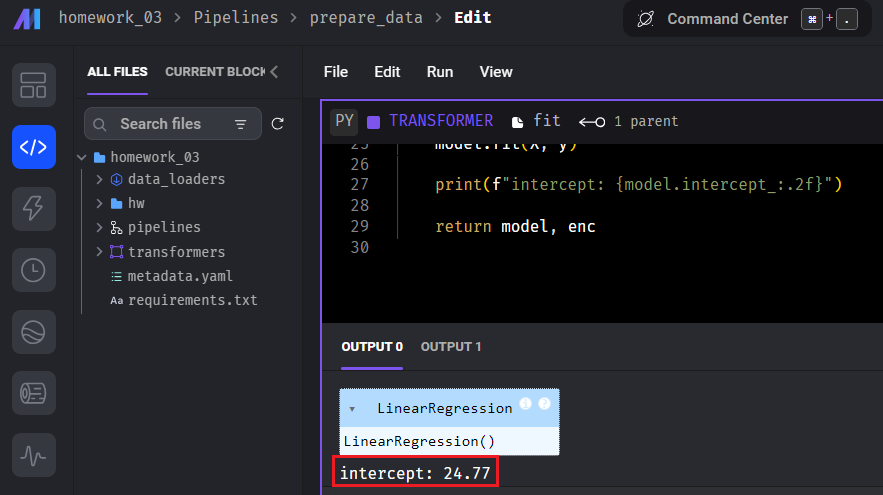

Answer: __24.77__

# Question 6. Register the model

The model is trained, so let's save it with MLFlow.

Create a data exporter block. In the block, we
* Log the model (linear regression)
* Save and log the artifact (dict vectorizer)

Find the logged model, and find MLModel file. What's the size of the model? (model_size_bytes field)

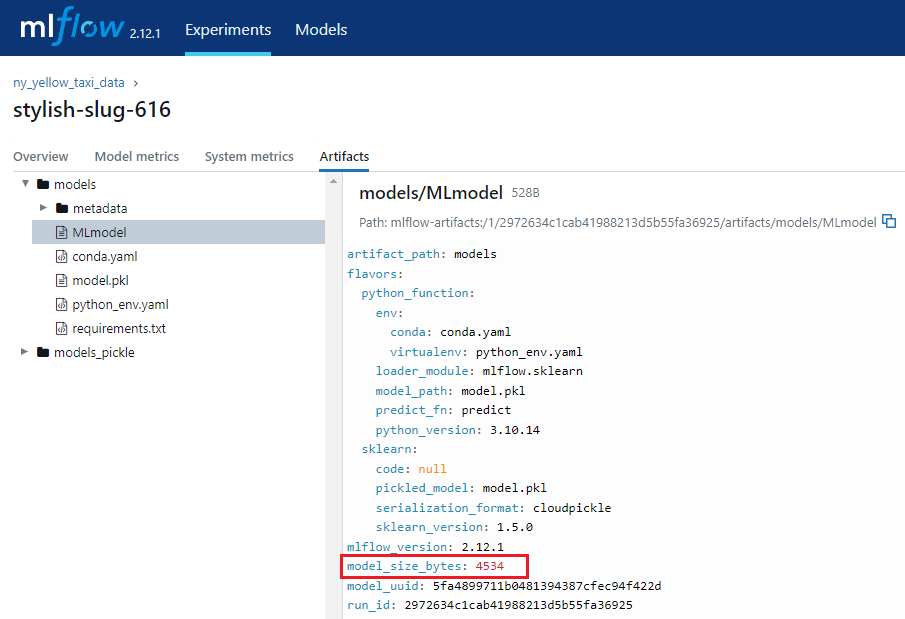

Answer: __4 534__